<a href="https://colab.research.google.com/github/reza370/ML-A1/blob/main/optional_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Laoding the data and data management

In [ ]:
import pandas as pd
import numpy as np
data = "https://www.unsiap.or.jp/on_line/ML/M6-clean_data.csv"
m6df = pd.read_csv(data)

In [ ]:
m6df.shape

(48751, 14)

In [ ]:
m6df.head()

,price,host_is_superhost,neighborhood,latitude,longitude,property_type,accommodates,bedrooms,beds,cleaning_fee,minimum_nights,availability_365,review_scores_rating,cancellation_policy
0,225,False,M-Zone,40.75362,-73.98377,Appartment,2,0,1,95,3,365,94.0,strict
1,200,False,M-Zone,40.74767,-73.97500,Appartment,2,1,1,125,3,0,90.0,moderate
2,60,False,A-Zone,40.68688,-73.95596,Appartment,2,1,1,0,29,365,90.0,strict
3,79,False,M-Zone,40.76489,-73.98493,Appartment,2,1,1,15,2,272,84.0,strict
4,79,False,M-Zone,40.80178,-73.96723,Appartment,1,1,1,0,2,0,98.0,flexible


In [ ]:
m6df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48751 entries, 0 to 48750
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 48751 non-null  int64  
 1   host_is_superhost     48751 non-null  bool   
 2   neighborhood          48751 non-null  object 
 3   latitude              48751 non-null  float64
 4   longitude             48751 non-null  float64
 5   property_type         48751 non-null  object 
 6   accommodates          48751 non-null  int64  
 7   bedrooms              48751 non-null  int64  
 8   beds                  48751 non-null  int64  
 9   cleaning_fee          48751 non-null  int64  
 10  minimum_nights        48751 non-null  int64  
 11  availability_365      48751 non-null  int64  
 12  review_scores_rating  48751 non-null  float64
 13  cancellation_policy   48751 non-null  object 
dtypes: bool(1), float64(3), int64(7), object(3)
memory usage: 4.9+ MB


In [ ]:
m6df.describe()

,price,latitude,longitude,accommodates,bedrooms,beds,cleaning_fee,minimum_nights,availability_365,review_scores_rating
count,48751.000000,48751.000000,48751.000000,48751.000000,48751.000000,48751.000000,48751.000000,48751.000000,48751.000000,48751.000000
mean,163.655576,40.729404,-73.951437,2.866772,1.183483,1.516379,56.181555,7.911427,120.672007,94.209637
std,421.770225,0.054387,0.047186,1.874130,0.760266,1.072879,66.262756,21.617116,140.393192,8.031328
min,0.000000,40.499790,-74.240840,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000
25%,69.000000,40.690020,-73.983530,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,93.000000
50%,105.000000,40.723610,-73.955500,2.000000,1.000000,1.000000,40.000000,3.000000,63.000000,96.000000
75%,175.000000,40.762845,-73.934635,4.000000,1.000000,2.000000,80.000000,5.000000,247.000000,99.000000
max,10000.000000,40.916990,-73.712990,22.000000,21.000000,16.000000,1200.000000,1250.000000,365.000000,100.000000


### one-hot encoding

In [ ]:
m6df["cancellation_policy"].value_counts()

strict      21888
flexible    15540
moderate    11323
Name: cancellation_policy, dtype: int64

In [ ]:
m6df["property_type"].value_counts()

Appartment     41746
House           5702
PrivateRoom     1303
Name: property_type, dtype: int64

In [ ]:
m6df["neighborhood"].value_counts()

M-Zone    21778
A-Zone    19604
Q-Zone     5859
B-Zone     1149
S-Zone      361
Name: neighborhood, dtype: int64

In [ ]:
m6df["host_is_superhost"].value_counts()

False    39055
True      9696
Name: host_is_superhost, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
m6df_copy = m6df.copy()
le=LabelEncoder()
le.fit(m6df["host_is_superhost"])
le.classes_
m6df_copy.host_is_superhost = le.fit_transform(m6df_copy["host_is_superhost"])

In [ ]:
def clean_data(m6df_copy):
    # One-hot encode columns: 'Education', 'WealthLevel'
    m6df_copy = pd.get_dummies(m6df_copy, columns=['cancellation_policy', 'property_type', 'neighborhood'])
    return m6df_copy

m6df_copy = clean_data(m6df_copy)
m6df_copy.head()

,price,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,cleaning_fee,minimum_nights,availability_365,...,cancellation_policy_moderate,cancellation_policy_strict,property_type_Appartment,property_type_House,property_type_PrivateRoom,neighborhood_A-Zone,neighborhood_B-Zone,neighborhood_M-Zone,neighborhood_Q-Zone,neighborhood_S-Zone
0,225,0,40.75362,-73.98377,2,0,1,95,3,365,...,0,1,1,0,0,0,0,1,0,0
1,200,0,40.74767,-73.97500,2,1,1,125,3,0,...,1,0,1,0,0,0,0,1,0,0
2,60,0,40.68688,-73.95596,2,1,1,0,29,365,...,0,1,1,0,0,1,0,0,0,0
3,79,0,40.76489,-73.98493,2,1,1,15,2,272,...,0,1,1,0,0,0,0,1,0,0
4,79,0,40.80178,-73.96723,1,1,1,0,2,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
m6df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48751 entries, 0 to 48750
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         48751 non-null  int64  
 1   host_is_superhost             48751 non-null  int64  
 2   latitude                      48751 non-null  float64
 3   longitude                     48751 non-null  float64
 4   accommodates                  48751 non-null  int64  
 5   bedrooms                      48751 non-null  int64  
 6   beds                          48751 non-null  int64  
 7   cleaning_fee                  48751 non-null  int64  
 8   minimum_nights                48751 non-null  int64  
 9   availability_365              48751 non-null  int64  
 10  review_scores_rating          48751 non-null  float64
 11  cancellation_policy_flexible  48751 non-null  uint8  
 12  cancellation_policy_moderate  48751 non-null  uint8  
 13  c

### Checking existance of missing values

In [ ]:
m6df.isna().sum()

price                   0
host_is_superhost       0
neighborhood            0
latitude                0
longitude               0
property_type           0
accommodates            0
bedrooms                0
beds                    0
cleaning_fee            0
minimum_nights          0
availability_365        0
review_scores_rating    0
cancellation_policy     0
dtype: int64

### Checking the distribution of features and label

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

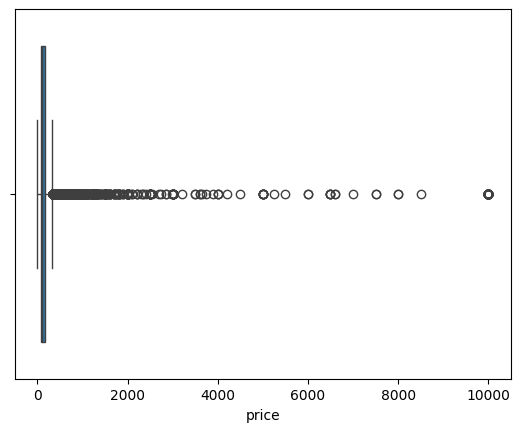

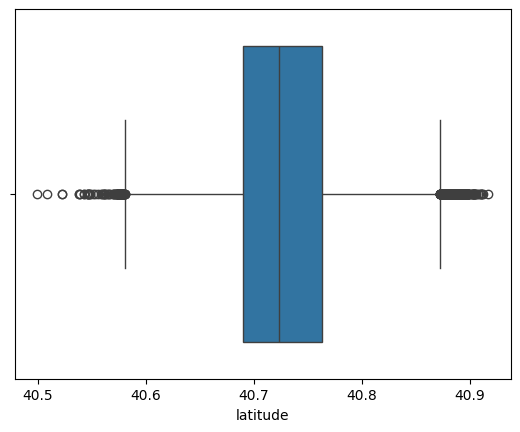

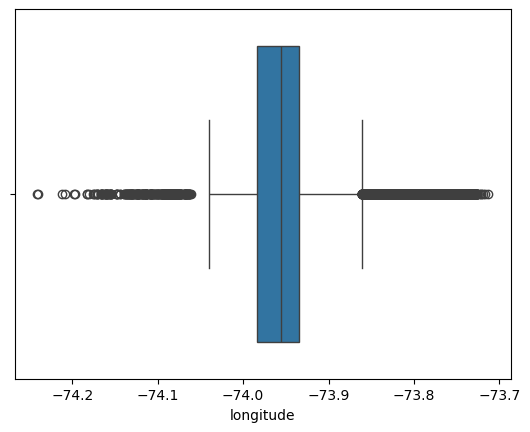

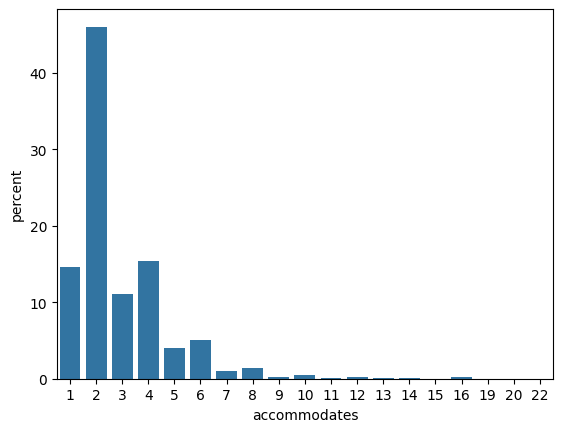

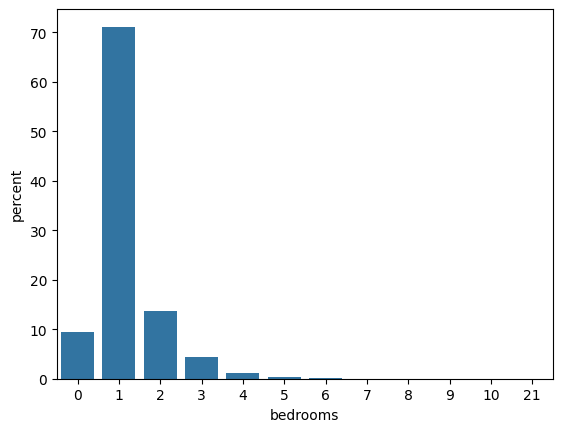

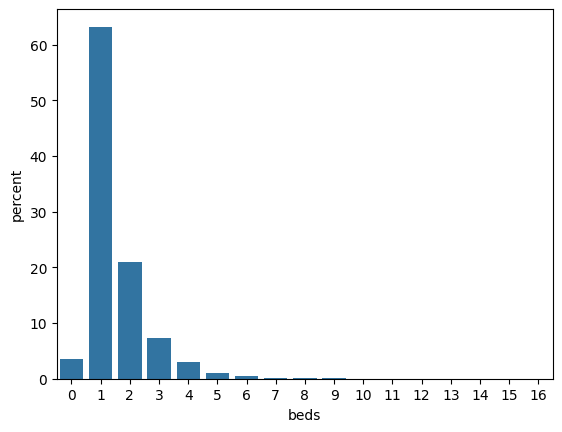

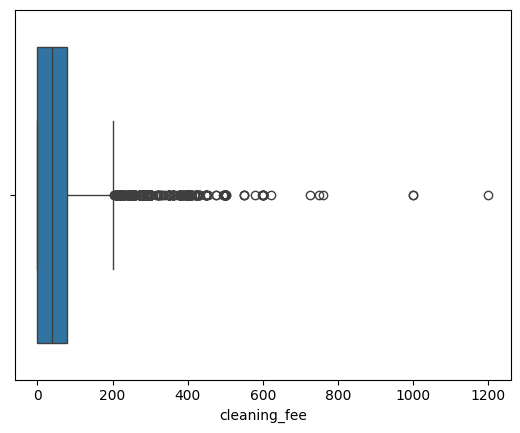

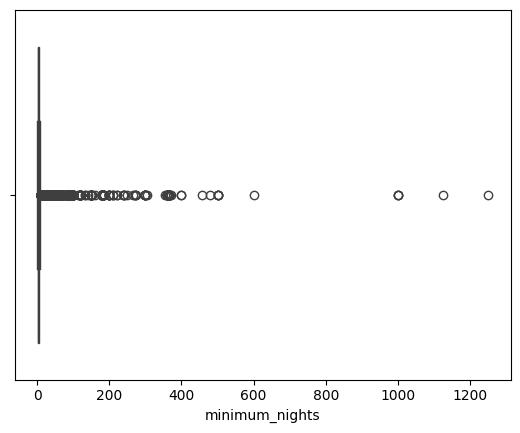

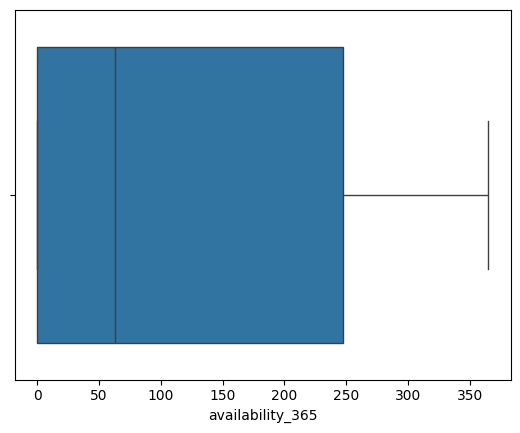

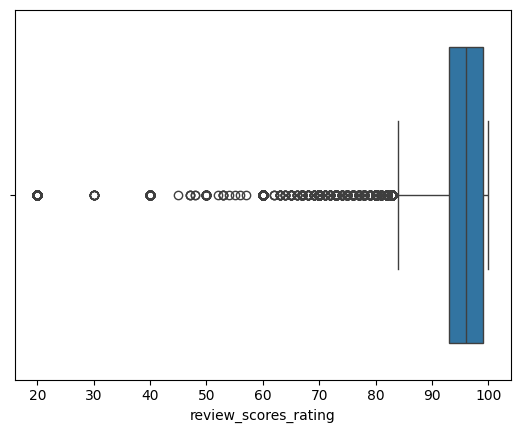

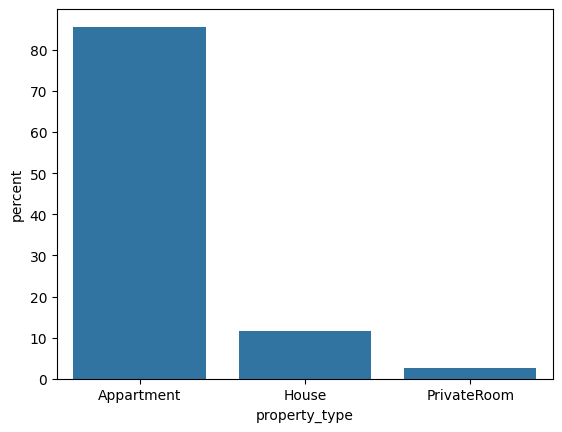

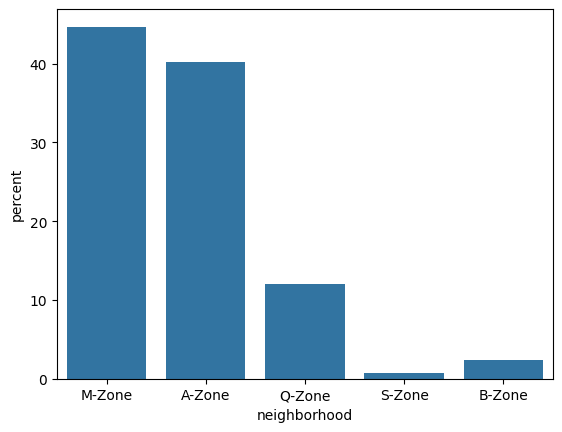

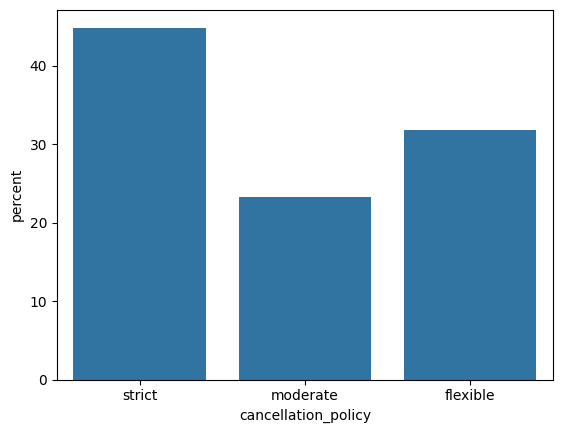

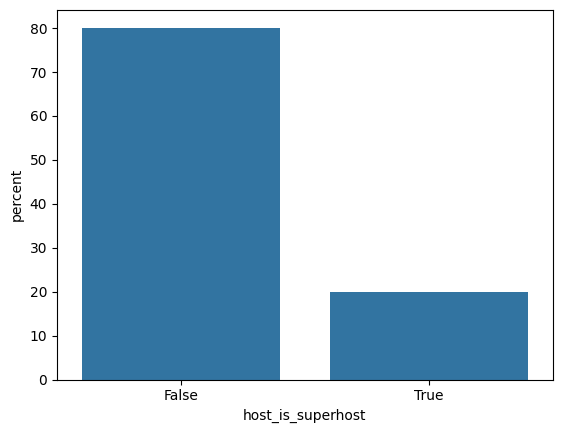

In [ ]:

sns.boxplot(data=m6df, x = 'price')
plt.show()
sns.boxplot(data=m6df, x = 'latitude')
plt.show()
sns.boxplot(data=m6df, x = 'longitude')
plt.show()
sns.countplot(data=m6df, x = 'accommodates',stat='percent')
plt.show()
sns.countplot(data=m6df, x = 'bedrooms', stat='percent')
plt.show()
sns.countplot(data=m6df, x = 'beds', stat='percent')
plt.show()
sns.boxplot(data=m6df, x = 'cleaning_fee')
plt.show()
sns.boxplot(data=m6df, x = 'minimum_nights')
plt.show()
sns.boxplot(data=m6df, x = 'availability_365')
plt.show()
sns.boxplot(data=m6df, x = 'review_scores_rating')
plt.show()
sns.countplot(data=m6df, x = 'property_type', stat='percent')
plt.show()
sns.countplot(data=m6df, x = 'neighborhood', stat='percent')
plt.show()
sns.countplot(data=m6df, x = 'cancellation_policy', stat='percent')
plt.show()
sns.countplot(data=m6df, x = 'host_is_superhost', stat='percent')
plt.show()

### Checking outliers

In [ ]:
def outlier_count(col, data = m6df_copy):

    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])

    # calculate your inter quatile
    iqr = q75 - q25

    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print("Min value =",min_val,"|", "Max value =", max_val)
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))
for col in m6df_copy.columns:
    outlier_count(col)


---------------price---------------

Min value = -90.0 | Max value = 334.0
Number of outliers: 2874
Percent of data that is outlier: 5.9%

---------------host_is_superhost---------------

Min value = 0.0 | Max value = 0.0
Number of outliers: 9696
Percent of data that is outlier: 19.89%

---------------latitude---------------

Min value = 40.5807825 | Max value = 40.872082500000005
Number of outliers: 452
Percent of data that is outlier: 0.93%

---------------longitude---------------

Min value = -74.0568725 | Max value = -73.86129249999999
Number of outliers: 2806
Percent of data that is outlier: 5.76%

---------------accommodates---------------

Min value = -1.0 | Max value = 7.0
Number of outliers: 1388
Percent of data that is outlier: 2.85%

---------------bedrooms---------------

Min value = 1.0 | Max value = 1.0
Number of outliers: 14090
Percent of data that is outlier: 28.9%

---------------beds---------------

Min value = -0.5 | Max value = 3.5
Number of outliers: 2478
Percent 

In [ ]:
# based on the outlier detection codes, to increase the prediction phisibility price outliers will be deleted.
m6df_copy = m6df_copy[m6df_copy.price < 334]

In [ ]:
m6df_copy.shape, m6df.shape

((45874, 22), (48751, 14))

### Corelation study

<Axes: >

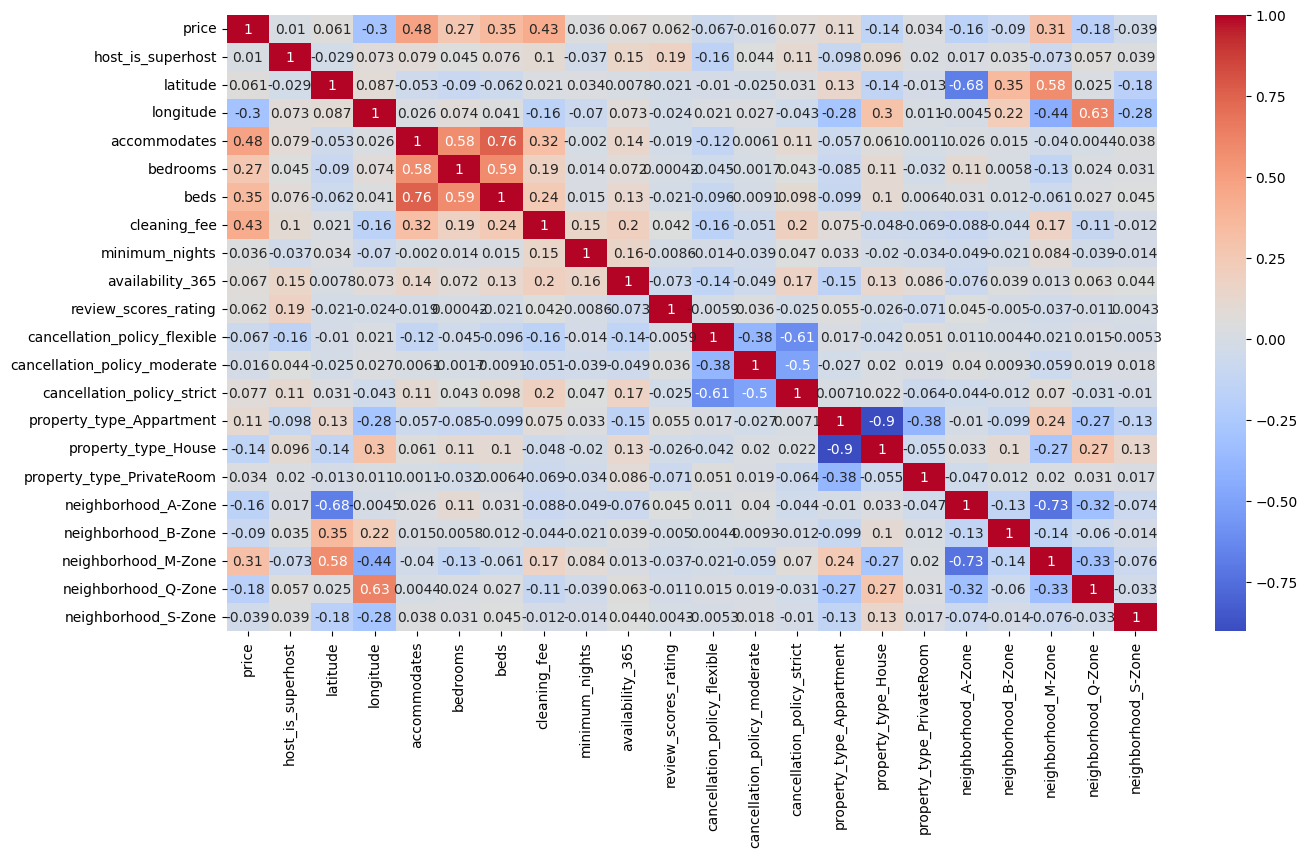

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(m6df_copy.corr(), annot=True, cmap="coolwarm")

### Predictive power score

<Axes: xlabel='x', ylabel='y'>

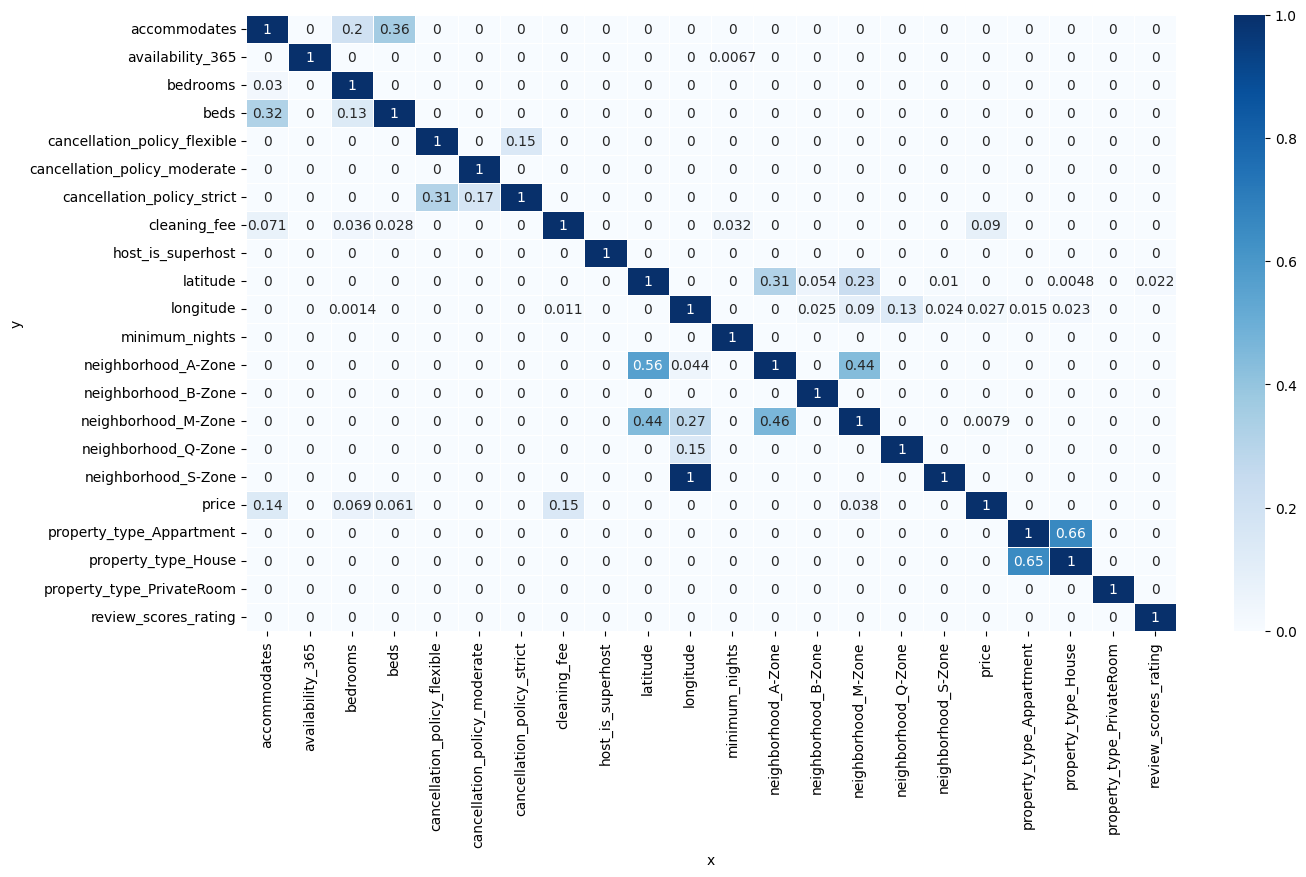

In [ ]:
import ppscore as pps

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(m6df_copy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

as we want to use LASSO to select some useful features we didn't consider the result of Correlation matrix and PPS, however they show that there are not many powerful predictors in this data (maybe because of many outliers).

### Test/Train split

In [ ]:
from sklearn.model_selection import train_test_split
X = m6df_copy.drop(columns='price')
y = m6df_copy.price
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=370)

In [ ]:
X.shape, Xtrain.shape, Xtest.shape, y.shape, ytrain.shape, ytest.shape

((45874, 21), (32111, 21), (13763, 21), (45874,), (32111,), (13763,))

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest  = scaler.transform(Xtest)

### Modeling

In [ ]:
from sklearn.linear_model import Lasso  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = Lasso(random_state=370, max_iter=2000)
lr.fit(Xtrain, ytrain)
yhat = lr.predict(Xtest)

print("MSE: ", mean_squared_error(ytest, yhat))
print("r2: ", r2_score(ytest, yhat))

MSE:  2540.5182884317232
r2:  0.43235821468506264


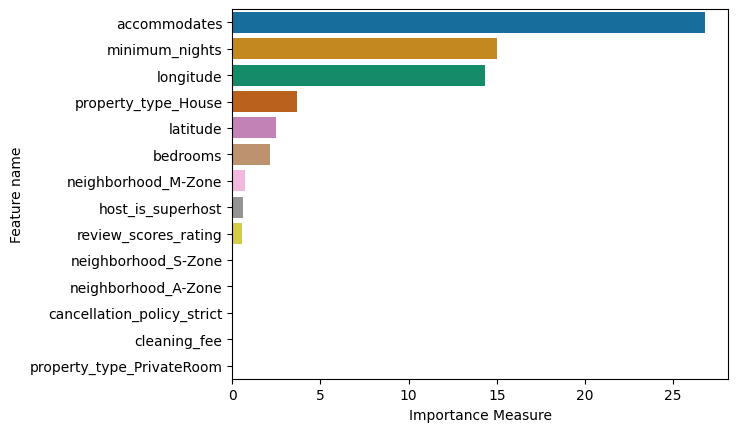

In [ ]:
feature_imp = lr.coef_
feature_names = X.columns
feature_importance = [feature_names, abs(feature_imp)]
len(feature_importance)
df = pd.DataFrame(feature_importance)
df1=df.T
feature_importance_sorted = df1.sort_values(by=1, ascending=False)

sns.barplot( y= feature_importance_sorted[0], x=feature_importance_sorted[1], hue= feature_importance_sorted[0], legend=False, palette="colorblind")
plt.xlabel("Importance Measure")
plt.ylabel("Feature name")
plt.show()


In [ ]:
#choosing featured based on Lasso
m6df_selected = m6df_copy.drop(columns=["neighborhood_B-Zone", "property_type_Appartment", "cancellation_policy_moderate",
                                        "availability_365", "beds", "neighborhood_Q-Zone", "cancellation_policy_flexible"])

In [ ]:
X = m6df_selected.drop(columns='price')
y = m6df_selected.price
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=370)

In [ ]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest  = scaler.transform(Xtest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
kfold = 5
param_grid = {'max_depth': np.arange(1,20), 'n_estimators': [10, 15, 20, 25, 30, 40, 50, 100, 200]}

rf = RandomForestRegressor(random_state = 370)

grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score=True,
                    refit=True,
                    scoring='r2')
grid.fit(Xtrain, ytrain);

In [ ]:
grid.best_params_


{'max_depth': 15, 'n_estimators': 200}

In [ ]:
# Find our grid_search's best score
best_r2 = grid.best_score_
best_r2  # ignore the minus because it's neg_mean_squared_error

0.5781081158497413

### Testing

In [ ]:
yhat = grid.predict(Xtest)
print("Mean Squared Error = ", mean_squared_error(ytest, yhat),"|", "R2 = ", r2_score(ytest, yhat))

Mean Squared Error =  1856.9177883147474 | R2 =  0.5850987834483459


### Feature importance

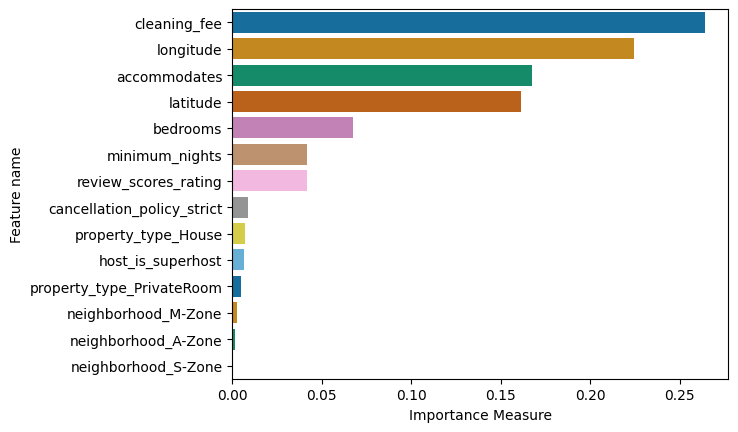

In [ ]:
rf = grid.best_estimator_

feature_imp = rf.feature_importances_
feature_names = X.columns
feature_importance = [feature_names, abs(feature_imp)]
len(feature_importance)
df = pd.DataFrame(feature_importance)
df1=df.T
feature_importance_sorted = df1.sort_values(by=1, ascending=False)

sns.barplot( y= feature_importance_sorted[0], x=feature_importance_sorted[1], hue= feature_importance_sorted[0], legend=False, palette="colorblind")
plt.xlabel("Importance Measure")
plt.ylabel("Feature name")
plt.show()


Text(0.5, 0, 'Random Forest Feature Importance')

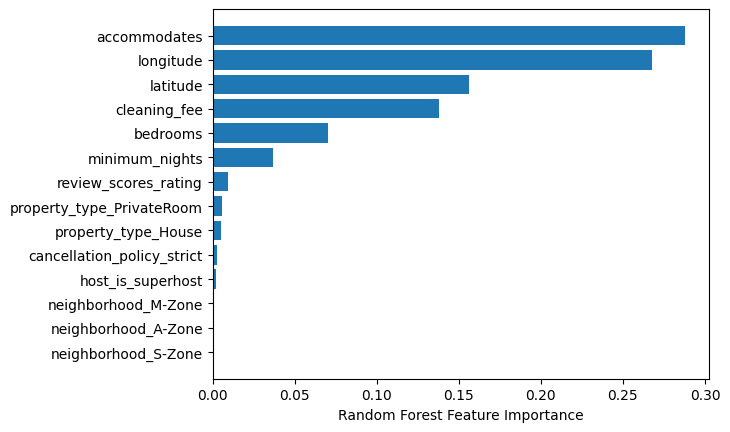

In [ ]:
#Permutation way
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, Xtest, ytest)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

the best model I could find shows that features like accomodatades, location, bedrooms, cleaning fee, minimum nights, and reviews are the best predictors of the price. to finalize the machine learning process, we need to save the model and do infrence by inputing some new samples.

### Saving the model

In [ ]:
import pickle

# save the model to disk
filename = 'mlos_project.model'
pickle.dump(grid, open(filename, 'wb'))
